In [1]:
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
### Keep all images in same size
Image_Size=[224,224]

In [3]:
###Image path for train and test(Valid)
train_path='Datasets/Train/'
valid_path='Datasets/Test/'

In [4]:
### Importing Resnet50
### using imagenet weights
resnet=ResNet50(include_top=False,input_shape=Image_Size+[3],weights='imagenet')

In [5]:
resnet

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
###not training existing wights
for layers in resnet.layers:
    layers.trainable=False

In [8]:
folders=glob('Datasets/Train/*')

In [9]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [10]:
### Flattening
x=Flatten()(resnet.output)

In [11]:
prediction=Dense(len(folders),activation='softmax')(x)

In [12]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 3) dtype=float32>

In [13]:
model=Model(inputs=resnet.input,outputs=prediction)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
training_set=train_datagen.flow_from_directory('Datasets/Train/',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.


In [23]:
testing_set=test_datagen.flow_from_directory('Datasets/Test/',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 58 images belonging to 3 classes.


In [24]:
r=model.fit_generator(training_set,validation_data=testing_set,
                     epochs=50,steps_per_epoch=len(training_set),
                     validation_steps=len(testing_set))

Epoch 1/50
2/2 [==============================] - 8s 4s/step - loss: 3.8246 - accuracy: 0.3438 - val_loss: 19.6409 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 7s 4s/step - loss: 13.5763 - accuracy: 0.3906 - val_loss: 8.2576 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 7s 4s/step - loss: 6.2071 - accuracy: 0.3594 - val_loss: 5.3843 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 6.9951 - accuracy: 0.3281 - val_loss: 8.3975 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 8s 4s/step - loss: 9.1100 - accuracy: 0.2969 - val_loss: 3.1601 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 7s 4s/step - loss: 2.5587 - accuracy: 0.3906 - val_loss: 5.3727 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 8s 4s/step - loss: 4.4861 - accuracy: 0.4531 - val_loss: 9.0834 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=======================

In [26]:
r

In [27]:
r.history

{'loss': [3.8245558738708496,
  13.576250076293945,
  6.20712947845459,
  6.9951395988464355,
  9.109996795654297,
  2.5586915016174316,
  4.486075401306152,
  4.995122909545898,
  4.689098834991455,
  1.8165597915649414,
  2.3210721015930176,
  2.6804494857788086,
  1.2235153913497925,
  1.7070460319519043,
  1.1002302169799805,
  0.9585725665092468,
  1.2484076023101807,
  0.665540874004364,
  0.9176074266433716,
  0.7490832805633545,
  0.675521731376648,
  0.8561564087867737,
  0.4389353394508362,
  0.5866873264312744,
  0.39449822902679443,
  0.512064516544342,
  0.4712488055229187,
  0.4179880917072296,
  0.45135051012039185,
  0.34302714467048645,
  0.4605640769004822,
  0.32808399200439453,
  0.3181803524494171,
  0.2893631160259247,
  0.3242305517196655,
  0.29198193550109863,
  0.29438742995262146,
  0.2718846797943115,
  0.2608603835105896,
  0.26012611389160156,
  0.24821580946445465,
  0.22825229167938232,
  0.2203390747308731,
  0.21959441900253296,
  0.22050170600414276,


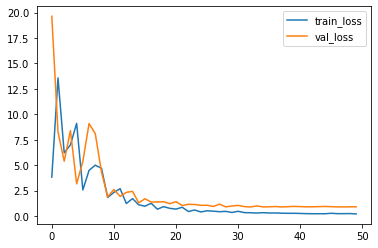

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig("LossValLoss")


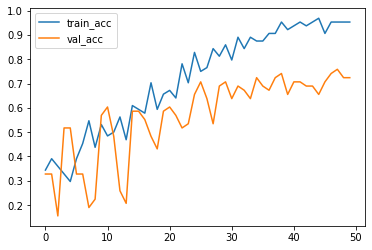

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig("AccVal_acc.jpg")


In [29]:
### Saving Model
model.save('model_resnet50.h5')

In [31]:
###prediction
y_pred=model.predict(testing_set)

In [32]:
y_pred

array([[6.97568655e-01, 2.31305897e-01, 7.11254030e-02],
       [3.06817144e-02, 1.86747625e-01, 7.82570660e-01],
       [1.16916306e-01, 1.03579536e-01, 7.79504120e-01],
       [2.35692414e-06, 1.19324762e-03, 9.98804450e-01],
       [8.37834179e-02, 2.25267671e-02, 8.93689811e-01],
       [1.34542976e-02, 8.11309457e-01, 1.75236240e-01],
       [1.19669526e-03, 9.91250277e-01, 7.55307544e-03],
       [1.82803888e-02, 5.01635134e-01, 4.80084449e-01],
       [1.10428482e-01, 6.73580885e-01, 2.15990648e-01],
       [8.62826221e-03, 9.03084576e-01, 8.82871151e-02],
       [7.02628016e-01, 1.34983780e-02, 2.83873588e-01],
       [5.39936475e-04, 7.19536126e-01, 2.79923916e-01],
       [2.07022112e-02, 2.23906385e-03, 9.77058709e-01],
       [7.47484416e-02, 3.86877984e-01, 5.38373590e-01],
       [8.03553313e-03, 9.20519650e-01, 7.14448765e-02],
       [4.59256582e-02, 7.01159704e-03, 9.47062731e-01],
       [2.33142748e-01, 4.36935931e-01, 3.29921305e-01],
       [3.27477865e-02, 9.11327

In [33]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1], dtype=int64)

In [35]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [36]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [37]:
x.shape


(224, 224, 3)

In [38]:
x=x/255

In [39]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [40]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)


array([[5.3672381e-03, 9.4007701e-04, 9.9369276e-01]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)


In [43]:
a==1

array([False])

In [44]:
a==2

array([ True])

In [45]:
a==3

array([False])